# Exercise 5: 

As seen in exercise 3 of this week, we can write the background scalar field equation as:
$$
\ddot{\Phi}+3H\dot{\Phi}+V'\left(\Phi\right)=0
$$
where $\Phi$ rapresents the scalr field, $V'\left(\Phi\right)=\frac{\partial V}{\partial \Phi}$ and the expression is written in cosmic time.

The other equations that regulates the evolution of H in time are given by Baumann'article on inflation (Appendix B1, pag.143) and state:
$$
H^2=\frac{1}{3}\left(\frac{1}{2}\dot{\Phi}^2+V\left(\Phi\right)\right)\\
\dot{H}=-\frac{1}{2}\dot{\Phi}^2
$$

With the proposed potential, we then have:
$$
\ddot{\Phi}+3H\dot{\Phi}+m\Phi=0\\
H^2=\frac{1}{6}\left(\dot{\Phi}^2+m\Phi^2\right)\\
\dot{H}=-\frac{1}{2}\dot{\Phi}^2
$$


In [2]:
# Useful imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

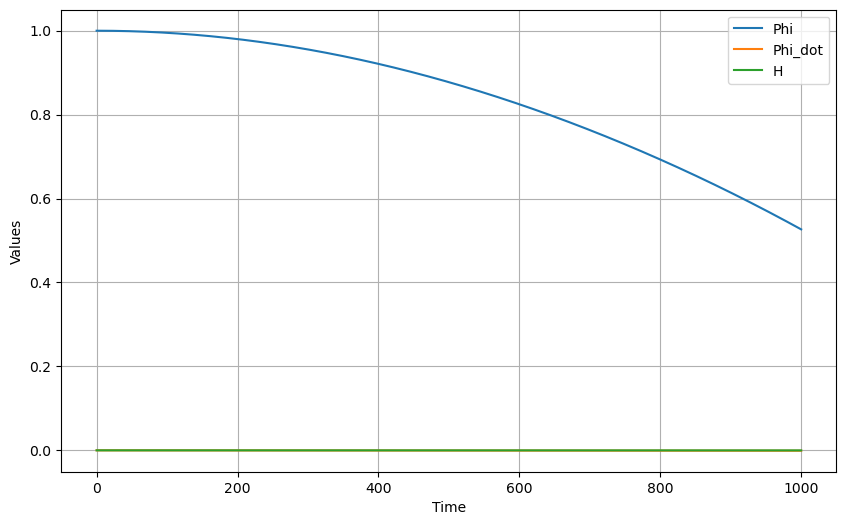

In [9]:

# Define the function that returns the system of differential equations
def system(y, t, m):
    Phi, Phi_dot, H = y
    dPhi_dt = Phi_dot
    dPhi_dot_dt = -3*H*Phi_dot - m*Phi
    dH_dt = -0.5*Phi_dot**2
    return [dPhi_dt, dPhi_dot_dt, dH_dt]

# Define parameters
m = 1e-6  # Mass
t = np.linspace(0, 1000, 100000)  # Time points to evaluate the solution
Phi_0 = 1.0  # Initial condition for Phi
Phi_dot_0 = 0.0  # Initial condition for the time derivative of Phi
H_0 = 1e-6 # Initial condition for Hubble parameter

# Initial conditions
y0 = [Phi_0, Phi_dot_0, H_0]

# Solve the system of differential equations
sol = odeint(system, y0, t, args=(m,))

# Extract solutions
Phi_sol = sol[:, 0]
Phi_dot_sol = sol[:, 1]
H_sol = sol[:, 2]




plt.figure(figsize=(10, 6))
plt.plot(t, Phi_sol, label='Phi')
plt.plot(t, Phi_dot_sol, label='Phi_dot')
plt.plot(t, H_sol, label='H')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
